# testing prior correction implementation

In [1]:
from haloflow import data as D
from haloflow import corr as Corr

In [2]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
Y_all, _ = D.hf2_centrals('all', 'mags', sim='TNG100')

(9.0, 15.0)

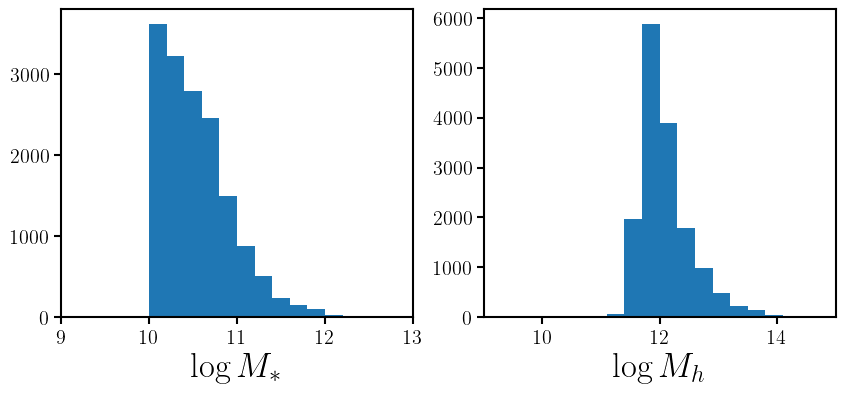

In [4]:
fig = plt.figure(figsize=(10, 4)) 
sub = fig.add_subplot(121)
_ = sub.hist(Y_all[:,0], bins=20, range=(9, 13))
sub.set_xlabel(r"$\log M_*$", fontsize=25)
sub.set_xlim(9, 13)

sub = fig.add_subplot(122)
_ = sub.hist(Y_all[:,1], bins=20, range=(9, 15))
sub.set_xlabel(r"$\log M_h$", fontsize=25)
sub.set_xlim(9, 15)

In [5]:
# "samples" from the prior
Y_sam = Y_all[::10]

In [6]:
w_smf, w_hmf = Corr.w_prior_corr(Y_sam, 'TNG100', bins=20)

(9.0, 15.0)

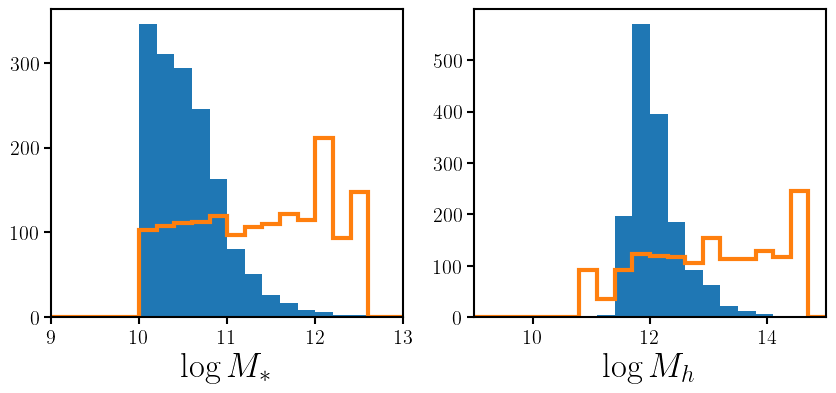

In [7]:
fig = plt.figure(figsize=(10, 4)) 
sub = fig.add_subplot(121)
_ = sub.hist(Y_sam[:,0], bins=20, range=(9, 13))
_ = sub.hist(Y_sam[:,0], weights=w_smf, bins=20, range=(9, 13), histtype='step', linewidth=3)
sub.set_xlabel(r"$\log M_*$", fontsize=25)
sub.set_xlim(9, 13)

sub = fig.add_subplot(122)
_ = sub.hist(Y_sam[:,1], bins=20, range=(9, 15))
_ = sub.hist(Y_sam[:,1], weights=w_hmf, bins=20, range=(9, 15), histtype='step', linewidth=3)

sub.set_xlabel(r"$\log M_h$", fontsize=25)
sub.set_xlim(9, 15)